In [1]:
# MODIFY!
notebook_name = 'score'

# Import Libaries & Define Functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
sns.set(style='whitegrid')

In [4]:
def frame_it(path):
    csv_files = glob.glob(path + '/*.csv')
    df_list = []
    
    for filename in csv_files:
        df = pd.read_csv(filename, index_col='Unnamed: 0', header=0)
        df_list.append(df)

    return pd.concat(df_list, axis=1)

In [5]:
def show_values_on_bars(axs, h_v="v", space=0.4,pct=False,neg=False):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_height())
                else: 
                    value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_width())
                else: 
                    value = '{:.2f}'.format(p.get_width())
                if neg == True: 
                    ax.text(_x, _y, value, ha="right")
                else:
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Analysis

In [6]:
# MODIFY!
df = frame_it('./scores')
# we tranpose the data for the analysis

In [7]:
df = df.reindex(['MAE','MSE','RMSE','Score Time','Fit Time'])
# we don't consider the standard deviation of the metrics

In [8]:
df = df.T
# we transpose the data frame due to way we exported the data

In [9]:
df_rmse = df.sort_values('RMSE')
df_rmse

,MAE,MSE,RMSE,Score Time,Fit Time
rf-no,3.041341,16.926432,4.103429,0.032162,2.926239
ela-net-rb-no,3.145177,16.938410,4.110629,0.002229,0.082444
svr-no,3.140086,17.134422,4.132400,0.012944,0.183107
poi-no,3.224268,17.237562,4.146260,0.001508,0.019777
rf-wo,3.051370,17.856828,4.209284,0.015552,2.243510
poi-wo,3.294599,18.886119,4.341527,0.002074,0.022960
ela-net-st-no,3.316664,19.455873,4.405823,0.006283,0.017953
ela-net-st-wo,3.316664,19.455873,4.405823,0.002167,0.006637
ela-net-rb-wo,3.322040,19.851027,4.446212,0.001867,0.025620
svr-wo,3.304858,20.125725,4.472616,0.032745,0.605047


In [10]:
df_rmse.to_csv(f'./analysis/{notebook_name}.csv')

## ERR Values [MBit/s] and [(MBit/s)^2]

In [11]:
df_rmse.style.highlight_min(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}])

,MAE,MSE,RMSE,Score Time,Fit Time
rf-no,3.041341,16.926432,4.103429,0.032162,2.926239
ela-net-rb-no,3.145177,16.938410,4.110629,0.002229,0.082444
svr-no,3.140086,17.134422,4.132400,0.012944,0.183107
poi-no,3.224268,17.237562,4.146260,0.001508,0.019777
rf-wo,3.051370,17.856828,4.209284,0.015552,2.243510
poi-wo,3.294599,18.886119,4.341527,0.002074,0.022960
ela-net-st-no,3.316664,19.455873,4.405823,0.006283,0.017953
ela-net-st-wo,3.316664,19.455873,4.405823,0.002167,0.006637
ela-net-rb-wo,3.322040,19.851027,4.446212,0.001867,0.025620
svr-wo,3.304858,20.125725,4.472616,0.032745,0.605047


## RMSE Performance Decline based on Best Performance [%]

In [12]:
df_rmse_min = df_rmse.apply(lambda value : -((value/df.min())-1),axis=1)

In [13]:
df_rmse_min = df_rmse_min.sort_values('RMSE',ascending=False)

In [14]:
df_rmse_min.to_csv(f'./analysis/{notebook_name}-min.csv')

In [15]:
df_rmse_min.style.highlight_max(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')

,MAE,MSE,RMSE,Score Time,Fit Time
rf-no,-0.00%,-0.00%,-0.00%,-2033.39%,-43989.62%
ela-net-rb-no,-3.41%,-0.07%,-0.18%,-47.84%,-1142.18%
svr-no,-3.25%,-1.23%,-0.71%,-758.59%,-2658.87%
poi-no,-6.01%,-1.84%,-1.04%,-0.00%,-197.98%
rf-wo,-0.33%,-5.50%,-2.58%,-931.61%,-33702.95%
poi-wo,-8.33%,-11.58%,-5.80%,-37.55%,-245.94%
ela-net-st-no,-9.05%,-14.94%,-7.37%,-316.79%,-170.49%
ela-net-st-wo,-9.05%,-14.94%,-7.37%,-43.76%,-0.00%
ela-net-rb-wo,-9.23%,-17.28%,-8.35%,-23.82%,-286.02%
svr-wo,-8.66%,-18.90%,-9.00%,-2072.08%,-9016.23%


## RMSE Performance Increment based on Worst Performance [%]

In [16]:
df_rmse_max = df.apply(lambda value : abs((value/df.max())-1),axis=1)

In [17]:
df_rmse_max = df_rmse_max.sort_values('RMSE',ascending=False)

In [18]:
df_rmse_max.to_csv(f'./analysis/{notebook_name}-max.csv')

In [19]:
df_rmse_max.style.highlight_max(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')
# the information in this table is not that meaningful / useful

,MAE,MSE,RMSE,Score Time,Fit Time
rf-no,8.45%,15.90%,8.25%,1.78%,0.00%
ela-net-rb-no,5.32%,15.84%,8.09%,93.19%,97.18%
svr-no,5.48%,14.86%,7.61%,60.47%,93.74%
poi-no,2.94%,14.35%,7.30%,95.40%,99.32%
rf-wo,8.15%,11.27%,5.89%,52.51%,23.33%
poi-wo,0.83%,6.16%,2.93%,93.67%,99.22%
ela-net-st-no,0.16%,3.33%,1.49%,80.81%,99.39%
ela-net-st-wo,0.16%,3.33%,1.49%,93.38%,99.77%
ela-net-rb-wo,0.00%,1.36%,0.59%,94.30%,99.12%
svr-wo,0.52%,0.00%,0.00%,0.00%,79.32%


# Visualization

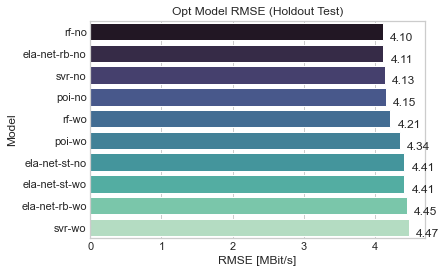

In [20]:
ax = sns.barplot(data=df_rmse, x='RMSE',y=df_rmse.index, palette='mako')
show_values_on_bars(ax, "h", 0.1)
ax.set(ylabel='Model',xlabel='RMSE [MBit/s]')
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('Opt Model RMSE (Holdout Test)');

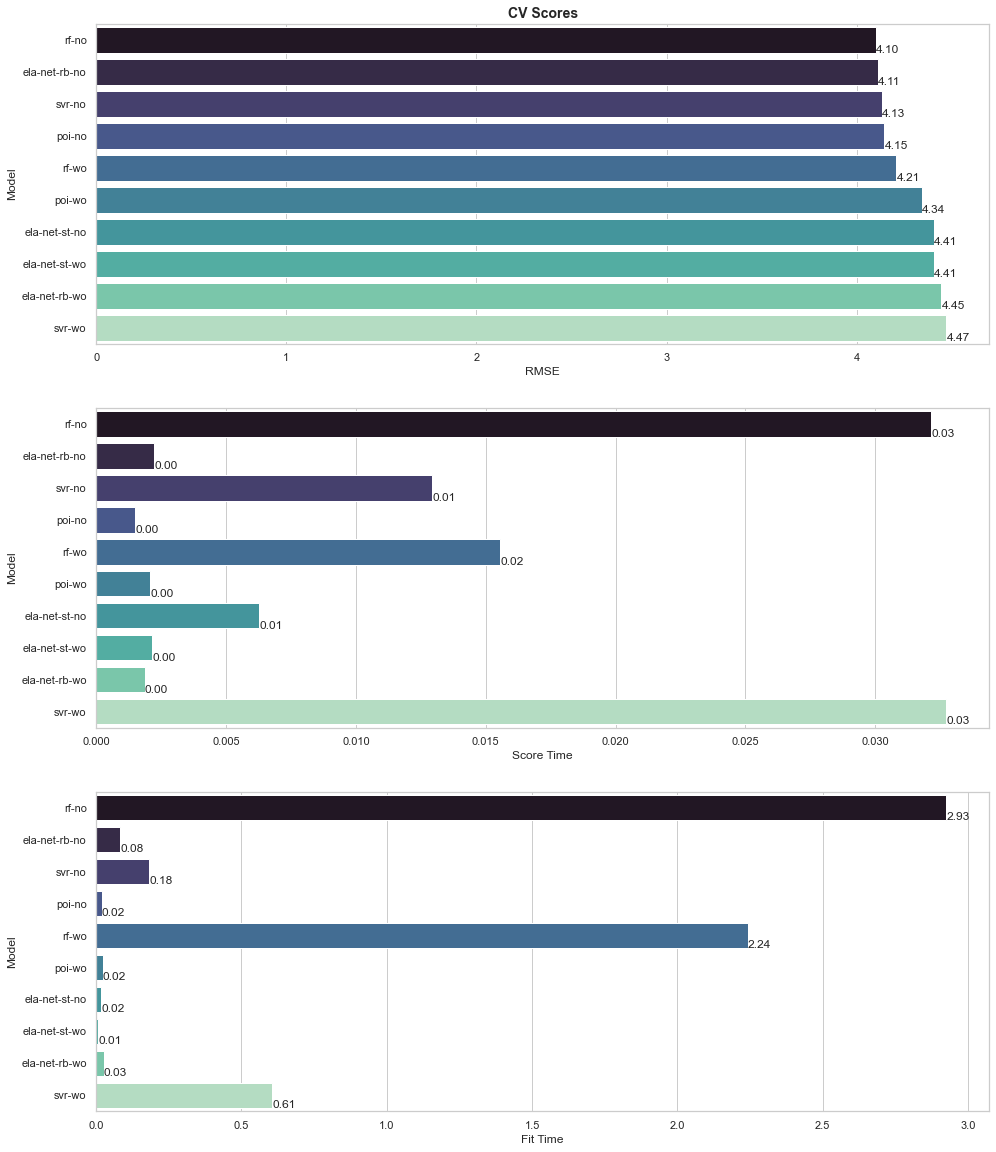

In [21]:
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(16,20))

# scores = ['RMSE', 'Score Time', 'Fit Time']

for i, column in enumerate(df_rmse.drop(['MAE', 'MSE'],axis=1)): 
    ax = sns.barplot(data=df_rmse, x=column,y=df_rmse.index, palette='mako',ax=axes[i])
    
    show_values_on_bars(ax, "h", 0)
    
    ax.set(ylabel='Model',xlabel=f'{column}')
    # ax.set_title(f'CV {column}')
    
axes[0].set_title('CV Scores',fontsize=14,fontweight='bold');

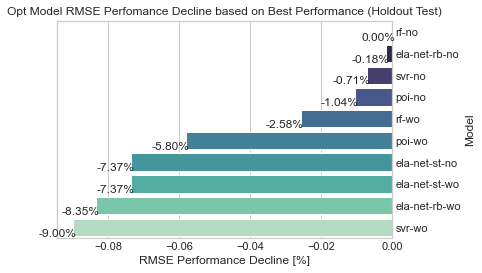

In [22]:
ax = sns.barplot(data=df_rmse_min,x='RMSE',y=df_rmse_min.index,palette='mako')

ax.set(ylabel='Model',xlabel='RMSE Performance Decline [%]')

ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis=u'both', which=u'both',length=0)

show_values_on_bars(ax,"h",0.001,True,True)

ax.set_title('Opt Model RMSE Perfomance Decline based on Best Performance (Holdout Test)');

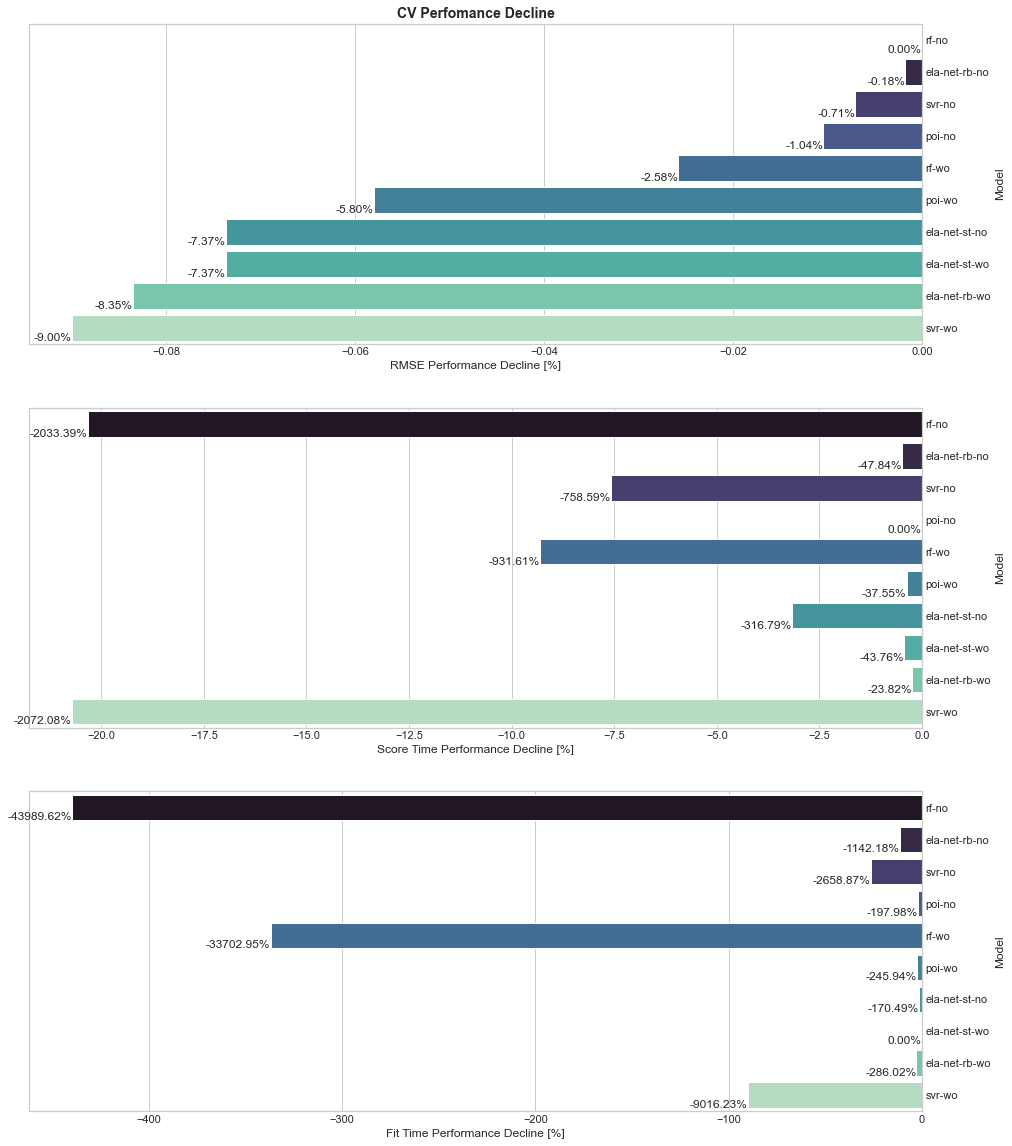

In [23]:
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(16,20))

# scores = ['RMSE', 'Score Time', 'Fit Time']

for i, column in enumerate(df_rmse_min.drop(['MAE', 'MSE'],axis=1)): 
    ax = sns.barplot(data=df_rmse_min, x=column,y=df_rmse_min.index, palette='mako',ax=axes[i])
    
    ax.set(ylabel='Model',xlabel=f'{column} Performance Decline [%]')
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.set_ticks_position("right")
    ax.tick_params(axis=u'both', which=u'both',length=0)

    
    show_values_on_bars(ax,"h",0,True,True)
    # ax.set_title(f'CV {column}')
    
axes[0].set_title('CV Perfomance Decline',fontsize=14,fontweight='bold');

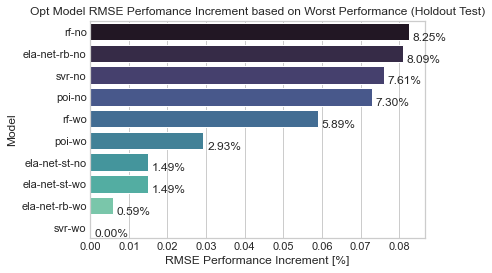

In [24]:
ax = sns.barplot(data=df_rmse_max,x='RMSE',y=df_rmse_max.index,palette='mako')
show_values_on_bars(ax,"h",0.001,True)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set(ylabel='Model',xlabel='RMSE Performance Increment [%]')

ax.set_title('Opt Model RMSE Perfomance Increment based on Worst Performance (Holdout Test)');

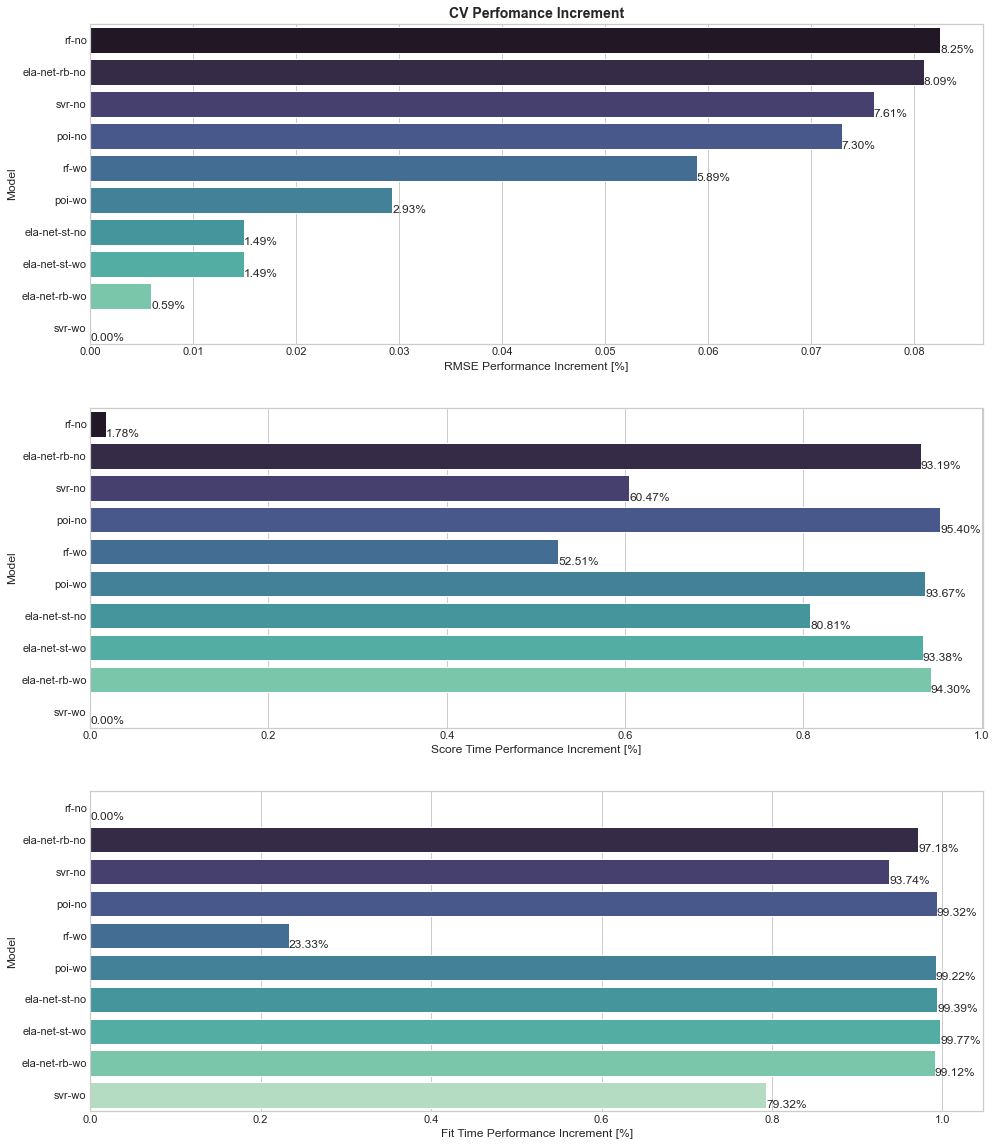

In [25]:
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(16,20))

# scores = ['RMSE', 'Score Time', 'Fit Time']

for i, column in enumerate(df_rmse_max.drop(['MAE', 'MSE'],axis=1)): 
    ax = sns.barplot(data=df_rmse_max, x=column,y=df_rmse_max.index, palette='mako',ax=axes[i])
    
    ax.set(ylabel='Model',xlabel=f'{column} Performance Increment [%]')
    
    ax.tick_params(axis=u'both', which=u'both',length=0)

    
    show_values_on_bars(ax,"h",0,True)
    # ax.set_title(f'CV {column}')
    
axes[0].set_title('CV Perfomance Increment',fontsize=14,fontweight='bold');

DONE!